In [ ]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('../data/yelp-text-by-stars.csv',sep=';',encoding="ISO-8859-1")
data.head(3)

,Stars,Text
0,1,Boarded my English Mastiff here over New Year'...
1,1,Another case of the Emperor's New Clothes. So...
2,1,Came on Valentine's Day night having pre-bough...


In [ ]:
corpus=data['Text']

In [ ]:
import gensim

In [ ]:
corpus = corpus.apply(lambda line : gensim.utils.simple_preprocess((line)))

In [ ]:
corpus[]

['boarded',
 'my',
 'english',
 'mastiff',
 'here',
 'over',
 'new',
 'year',
 'they',
 're',
 'closed',
 'on',
 'sunday',
 'so',
 'even',
 'though',
 'we',
 'got',
 'home',
 'on',
 'sunday',
 'we',
 'had',
 'to',
 'leave',
 'him',
 'here',
 'another',
 'day',
 'and',
 'pay',
 'for',
 'another',
 'day',
 'because',
 'we',
 'couldn',
 'pick',
 'him',
 'up',
 'until',
 'monday',
 'morning',
 'he',
 'got',
 'complimentary',
 'bath',
 'with',
 'his',
 'boarding',
 'when',
 'did',
 'pick',
 'him',
 'up',
 'once',
 'got',
 'him',
 'in',
 'the',
 'car',
 'noticed',
 'very',
 'pungent',
 'musky',
 'odor',
 'couldn',
 'figure',
 'out',
 'what',
 'it',
 'was',
 'until',
 'got',
 'him',
 'home',
 'the',
 'smell',
 'was',
 'so',
 'bad',
 'had',
 'to',
 'leave',
 'the',
 'car',
 'windows',
 'open',
 'to',
 'air',
 'it',
 'out',
 'he',
 'had',
 'greenish',
 'material',
 'on',
 'the',
 'underside',
 'of',
 'his',
 'tail',
 'and',
 'around',
 'his',
 'butt',
 'tried',
 'to',
 'clean',
 'it',
 'off',
 

## Apprentissage du Word2vec

In [ ]:
import multiprocessing
cores=multiprocessing.cpu_count()
cores

10

In [ ]:
model_size=100
model=gensim.models.Word2Vec(corpus,vector_size=model_size,sg=0,window=5,min_count=2,workers=cores-1)

In [ ]:
for i in range(100):
    model.train(corpus,total_examples=len(corpus),epochs=1)
    print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [ ]:
model.save('../models/Word2vec_entraine.h5')

In [ ]:
model=gensim.models.Word2Vec.load('../models/Word2vec_entraine.h5')

In [ ]:
len(model.wv.index_to_key)

34269

In [ ]:
model.wv['girl']

array([-0.663523  ,  0.48704475, -0.29130507,  0.09817669, -2.4124255 ,
       -0.66274035, -1.2819668 ,  0.7257124 ,  0.34833205, -0.44960335,
       -0.05920684, -2.155815  ,  0.844793  , -3.177553  ,  0.10661714,
        0.0681667 ,  1.9510496 ,  2.4430745 , -0.10884288,  0.40583977,
       -1.5429975 ,  0.7907237 ,  0.6034332 ,  0.99428886,  0.8319442 ,
       -3.0264728 , -1.8029993 ,  2.145028  , -0.7196177 , -0.13528213,
        0.70985115,  1.556529  ,  1.3476598 , -1.4497552 ,  1.8267361 ,
        1.3544207 ,  0.39077958,  0.24505036, -2.8197005 ,  0.3780027 ,
        1.5865445 , -1.4379376 ,  0.9247621 ,  0.39285553, -1.1240542 ,
       -0.47039288,  1.9939768 ,  1.7015936 ,  1.6183431 , -1.6785774 ,
        0.05598402,  1.2721634 ,  3.1114435 ,  2.7275815 , -0.5730655 ,
        1.2540784 ,  0.14449047,  0.00545885,  1.1682687 , -0.33682674,
       -1.5003449 ,  0.04740997,  0.78144735, -0.86427855,  1.3558648 ,
        1.4468167 , -0.12426405, -0.04227358,  2.5648909 ,  0.25

In [ ]:
model.wv.most_similar(positive='thank',topn=10)

[('thanks', 0.6278936862945557),
 ('bless', 0.5447596311569214),
 ('sorry', 0.4637860953807831),
 ('forbid', 0.45080479979515076),
 ('orbs', 0.407461941242218),
 ('thanking', 0.4048599600791931),
 ('hi', 0.40376967191696167),
 ('hello', 0.4000455141067505),
 ('salute', 0.3964287340641022),
 ('believers', 0.39291277527809143)]

In [ ]:
model.wv.doesnt_match(['food','drink','play'])

'play'

In [ ]:
model.wv.most_similar(positive=['king','woman'],negative=['man'],topn=1)

[('queen', 0.5080788135528564)]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


def tsnescatterplot(model, word, list_names, model_size):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """

    if (model_size>300):
        model_size=300

    arrays = np.empty((0, model_size), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)

    # gets list of most similar words
    close_words = model.wv.most_similar([word])

    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)

    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    # Reduces the dimensionality from model_size to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)

    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)

    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})

    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)

    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )

    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)


    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

    plt.title('t-SNE visualization for {}'.format(word.title()))

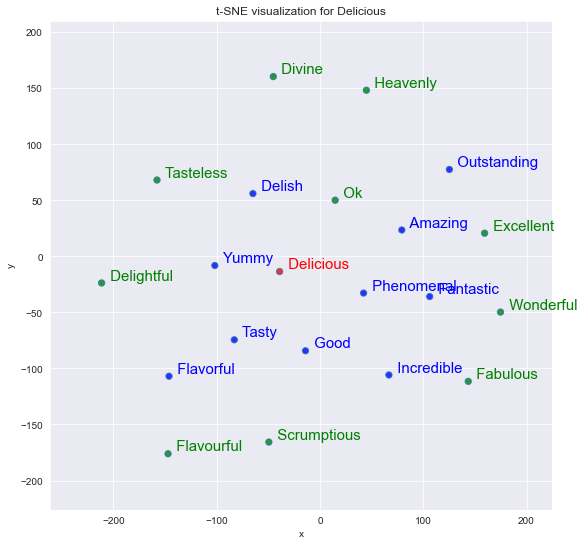

In [ ]:
word_tested='delicious'
tsnescatterplot(model, word_tested,[t[0] for t in
                                    model.wv.most_similar(positive=word_tested,topn=20)[10:]] , model_size)

In [ ]:
a=girl'
model.wv.most_similar(a,topn=1)

[('girl', 1.0)]